## Case Study: Bike Sales Analysis using Python

In [58]:
import pandas as pd
import numpy as np
# import openpyxl

In [59]:
bikes_data = pd.read_csv('bike data.csv')

In [60]:
bikes_data.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


In [61]:
copy_bikes_data= bikes_data

## Data Wrangling

#### Data Assessing

##### SUMMARY OF DATA
The dataset contains sales data for bikes and related accessories across different countries. It also includes information about customers and their age groups.

#### Column Description :
1. Date : Date of item purchased
2. year :
3. Customer ID : Customer ID of customer who puchased the items
4. Customer Age : 
5. Age Group: Customer are classified into four age group Youth(<25), Young Adults(25-34), Adults(35-64) and Seniors(>64)
6. Customer Gender : 
7. Country: Country of Customer from where he/she belongs.
8. State : Customer State
9. Product Category: Highlevel Classification of product majorly 3 types of product are available such as Bikes,Clothing & Accessories.
10. Sub Category: To classify products from a general Product Category to more specific subcategories.
11. Product: Name of Product
12. Frame Size: The right bicycle frame size depends on your height and leg length.
13. Order Quantity: No. quantity ordered
14. Unit Cost: Cost of each units
15. Unit Price: Price of each units
16. Cost: Total cost ( quantity*unit_cost)
17. Revenue:
18. Profit:

#### Issues with dataset

### Dirty DATA ( Data with quality Issue):
1. The DATE field contains inconsistent formats: MM-DD-YYYY and MM-DD-YY. -- Consistency Issue
2. Column names contains the spaces.(Against the standard) -- Consistency Issue
3. Revenue = Unit_Price * Order_Quantity . But Revenue value not as per the formula (Need to find the reason).-- Accuracy Issue
4. Date field datatype is object but it should be date type. -- Consistency Issue
5. Frame Size has NaN value. 87054 -- null values -- Completeness
6. 1000 rows duplicate found. -- accuracy Issue

### Messy Data (Data with Structure Issue):
1. Age group column should split into 3 cloumn Age_group , Min_age_grp and Max_age_grp.

In [62]:
# Mannual Assessment
bikes_data.to_excel('bikes_sales.xlsx')

##### Programmatic Assessment

In [63]:
# Check the basic information about the data
 
print(bikes_data.columns)
print(bikes_data.shape)
print(bikes_data.size) 
print(bikes_data.index)
print(bikes_data.columns.size)

Index(['Date', 'year', 'Customer ID', 'Customer Age', 'Age Group',
       'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category', 'Product', 'Frame Size', 'Order Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Profit'],
      dtype='object')
(113036, 18)
2034648
RangeIndex(start=0, stop=113036, step=1)
18


In [64]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   year              113036 non-null  int64  
 2   Customer ID       113036 non-null  int64  
 3   Customer Age      113036 non-null  int64  
 4   Age Group         113036 non-null  object 
 5   Customer Gender   113036 non-null  object 
 6   Country           113036 non-null  object 
 7   State             113036 non-null  object 
 8   Product Category  113036 non-null  object 
 9   Sub Category      113036 non-null  object 
 10  Product           113036 non-null  object 
 11  Frame Size        25982 non-null   float64
 12  Order Quantity    113036 non-null  int64  
 13  Unit Cost         113036 non-null  int64  
 14  Unit Price        113036 non-null  int64  
 15  Cost              113036 non-null  int64  
 16  Revenue           11

### Concept
##### Key Difference:
1. Series.unique: Refers to the method itself (no computation performed).
2. Series.unique(): Calls the method and returns the unique values (computation performed).


In [65]:
bikes_data['Date'].isnull().sum() # no null value
bikes_data['Frame Size'].isnull().sum() # 87054 -- null values
unique = bikes_data['Frame Size'].unique()
print(unique)
type(unique)

[nan 38. 44. 48. 42. 46. 40. 52. 62. 58. 56. 60. 50. 54.]


numpy.ndarray

### Concept
#### Explanation of duplicated():
##### By default, it checks for duplicate rows and marks all except the first occurrence as True.
1. keep='first': (Default) Marks all duplicates after the first occurrence as True.
2. keep='last': Marks all duplicates except the last occurrence as True.
3. keep=False: Marks all occurrences of duplicates as True.

Note - s[s.str.len()<2]

In [66]:
# Duplicate Check
bikes_data[bikes_data.duplicated(keep=False)]
# bikes_data[bikes_data['Customer ID'] ==28931].duplicated()
# print()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
1020,12/19/2013,2013,28931,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,NaN,9,59,159,531,1245,714
1021,12/19/2013,2013,28931,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,NaN,9,59,159,531,1245,714
1090,9/30/2015,2015,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,NaN,5,4,10,20,40,20
1091,9/30/2015,2015,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,NaN,5,4,10,20,40,20
1092,10/24/2013,2013,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,NaN,2,4,10,8,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111265,4/27/2014,2014,27295,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",50.0,1,1482,2384,1482,1860,378
111952,9/20/2013,2013,29256,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",44.0,1,461,742,461,735,274
111953,9/20/2013,2013,29256,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",44.0,1,461,742,461,735,274
111954,9/20/2015,2015,29256,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",44.0,1,461,742,461,735,274


### Data Cleaning

Already made the copy of original datafram ; copy_bikes_data

Steps involved in Data cleaning
1. Define
2. Code
3. Test

In [67]:
# Dropping the duplicate records
bikes_data.drop_duplicates(inplace=True)

In [68]:
# Testing after duplicate drops 
print(bikes_data.shape)
bikes_data.describe()

(112036, 18)


,year,Customer ID,Customer Age,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
count,112036.000000,112036.000000,112036.000000,25794.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,2014.400925,19223.313917,35.919508,47.312941,11.904254,267.819603,453.850628,471.103333,757.138527,286.035194
std,1.273327,5306.209041,11.016543,6.862813,9.564877,550.218722,922.751848,886.971635,1312.061623,454.852634
min,2011.000000,11000.000000,17.000000,38.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-30.000000
25%,2013.000000,14608.000000,28.000000,42.000000,2.000000,2.000000,5.000000,28.000000,64.000000,29.000000
50%,2014.000000,18637.000000,35.000000,46.000000,10.000000,9.000000,25.000000,112.000000,226.000000,103.000000
75%,2016.000000,23470.000000,43.000000,52.000000,20.000000,42.000000,70.000000,442.000000,806.000000,360.000000
max,2016.000000,29483.000000,87.000000,62.000000,32.000000,2171.000000,3578.000000,42978.000000,58074.000000,15096.000000


# Define the solution for data Issue
1. For NaN value in Frame Size keep the value as -1 mean Not Applicable 
2. Age group will split into 2 columns
3. Columns Name space replaced by '_'
4. Date field should be converted into datetype and make the date format consistent which is 'MM-DD-YYYY'.
5. Duplicates value is already dropped

In [69]:
# Fill the NaN value 
bikes_data.fillna('-1',inplace=True)

/var/folders/cq/r96cwmz1327cflkjdx9t2ky00000gp/T/ipykernel_2254/4267287279.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bikes_data.fillna('-1',inplace=True)


In [70]:
# Test
bikes_data.isnull().sum()

Date                0
year                0
Customer ID         0
Customer Age        0
Age Group           0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Product             0
Frame Size          0
Order Quantity      0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Profit              0
dtype: int64

DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=None, inplace=False, level=None, errors='ignore')[source]

Note: Mapper will be either function or dict. No List

In [71]:
# Column Names -- issue
bike_columns = list(bikes_data.columns.str.replace(' ',"_"))
modified_columns = {}
for i in bikes_data.columns:
    modified_columns[i]=i.replace(' ','_').title()
    
    # print(i)
modified_columns
bikes_data.rename(columns=modified_columns,inplace=True)

In [72]:
# Test
print(bikes_data.columns)
bikes_data.head()

Index(['Date', 'Year', 'Customer_Id', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Frame_Size', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Cost', 'Revenue', 'Profit'],
      dtype='object')


,Date,Year,Customer_Id,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Frame_Size,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,-1,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,-1,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,-1,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,-1,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,-1,4,45,120,180,418,238


##### 2. Spliting the Age Group column into 2 columns

In [73]:
import re 
def split_age_group(x):
    return ( re.sub('[^A-Za-z]',"",re.split('<|>',x)[0]) ,''.join(re.findall('[0-9]|-',x)))

### CONCEPT
The tolist() method is part of the Pandas and NumPy libraries in Python, and it is used to convert a data structure (like a Pandas Series, DataFrame, or NumPy array) to a Python list.
##### When to Use Which:
1. Use Pandas tolist() for converting Series or DataFrame columns.
2. Use NumPy tolist() for converting NumPy arrays.

In [74]:
bikes_data[['Age_Category', 'Age_Value']] = pd.DataFrame(bikes_data['Age_Group'].apply(split_age_group).tolist(), index=bikes_data.index)

In [75]:
bikes_data.rename(columns={'Age_Value':"Age_Range"},inplace=True)

In [76]:
# Test
bikes_data.sample()

,Date,Year,Customer_Id,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Frame_Size,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit,Age_Category,Age_Range
51966,6/29/2014,2014,13515,55,Adults (35-64),F,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",38.0,1,1266,2320,1266,2158,892,Adults,35-64


In [77]:
# Replacing 25 with range 0-25 and 64< with 64-100
# bikes_data['Age_Range'][bikes_data['Age_Range']=='25'].unique()
bikes_data['Age_Range']=bikes_data['Age_Range'].replace({'25':'0-25','64':'64-100'})


In [78]:
#test
bikes_data['Age_Range'][bikes_data['Age_Range']=='25'].unique()
bikes_data['Age_Range'][bikes_data['Age_Range']=='64'].unique()

array([], dtype=object)

3. Date field assign to proper date datype

In [79]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Year              112036 non-null  int64 
 2   Customer_Id       112036 non-null  int64 
 3   Customer_Age      112036 non-null  int64 
 4   Age_Group         112036 non-null  object
 5   Customer_Gender   112036 non-null  object
 6   Country           112036 non-null  object
 7   State             112036 non-null  object
 8   Product_Category  112036 non-null  object
 9   Sub_Category      112036 non-null  object
 10  Product           112036 non-null  object
 11  Frame_Size        112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Cost              112036 non-null  int64 
 16  Revenue           112036 non-null  int64 
 

In [80]:
bikes_data['Date'] = pd.to_datetime(bikes_data['Date'] )

In [81]:
import datetime as dt

In [82]:
# test
bikes_data['Date'].dt.year.unique()
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              112036 non-null  datetime64[ns]
 1   Year              112036 non-null  int64         
 2   Customer_Id       112036 non-null  int64         
 3   Customer_Age      112036 non-null  int64         
 4   Age_Group         112036 non-null  object        
 5   Customer_Gender   112036 non-null  object        
 6   Country           112036 non-null  object        
 7   State             112036 non-null  object        
 8   Product_Category  112036 non-null  object        
 9   Sub_Category      112036 non-null  object        
 10  Product           112036 non-null  object        
 11  Frame_Size        112036 non-null  object        
 12  Order_Quantity    112036 non-null  int64         
 13  Unit_Cost         112036 non-null  int64         
 14  Unit_Pric

### Now we have a clean data , good to go for EDA

##### Apply few more transformation on data
1. I replaced the ‘M’ and ‘F’ in the gender column to ‘Male’ and ‘Female’ 




In [83]:
# bikes_data['Customer_Gender'].replace('M','Male',inplace=True)
bikes_data['Customer_Gender'].replace({'F':'Female','M':'Male'},inplace=True)

/var/folders/cq/r96cwmz1327cflkjdx9t2ky00000gp/T/ipykernel_2254/4074253915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bikes_data['Customer_Gender'].replace({'F':'Female','M':'Male'},inplace=True)


In [31]:
# bikes_data.drop(columns='Date',inplace=True)

In [32]:
bikes_data['Age_Range'].unique()

array(['0-25', '35-64', '25-34', '64-100'], dtype=object)

### Answering the question by Anaylsing the data

1. Age distribution of cutomers

In [125]:
age_dis = bikes_data['Age_Group'].value_counts()

<Axes: title={'center': 'Age Distribution'}, ylabel='count'>

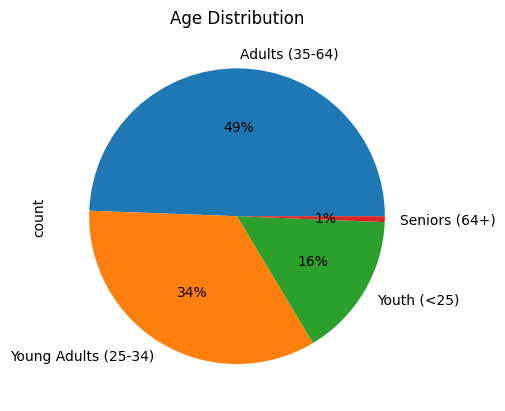

In [126]:
age_dis.plot(kind='pie',autopct='%.0f%%',title='Age Distribution')

### Age distribution of customer indicates that highest number of customer is Adults whose age is between 35-64.

In [44]:
# 2. Most profitable year
bikes_data["Year"].unique()

array([2013, 2015, 2014, 2016, 2012, 2011])

In [48]:
bikes_data.groupby('Year')['Profit'].sum().sort_values(ascending=False).head(1) 
# 2015 by coding 

Year
2015    7497361
Name: Profit, dtype: int64

<Axes: title={'center': 'Profit by Year'}, xlabel='Amount (Million USD)', ylabel='Year'>

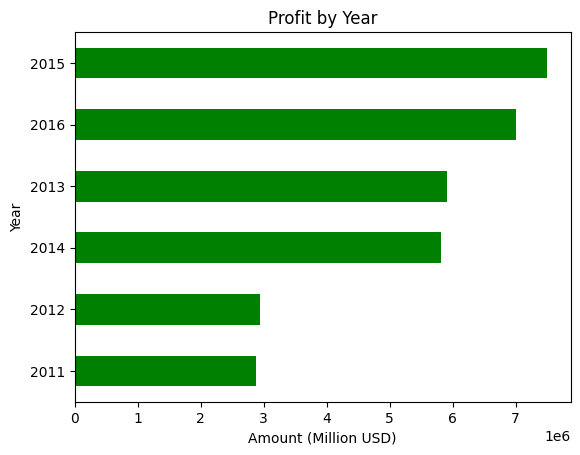

In [55]:
# By Visualization
bikes_data.groupby('Year')['Profit'].sum().sort_values(ascending=True).plot(kind='barh',xlabel='Amount (Million USD)',ylabel='Year',color='green',title="Profit by Year")

### The most profitable year for bikes sales is 2015

In [103]:
# 3. Most profitable Month
bikes_data['Month']=bikes_data['Date'].dt.month_name()

<Axes: xlabel='Month'>

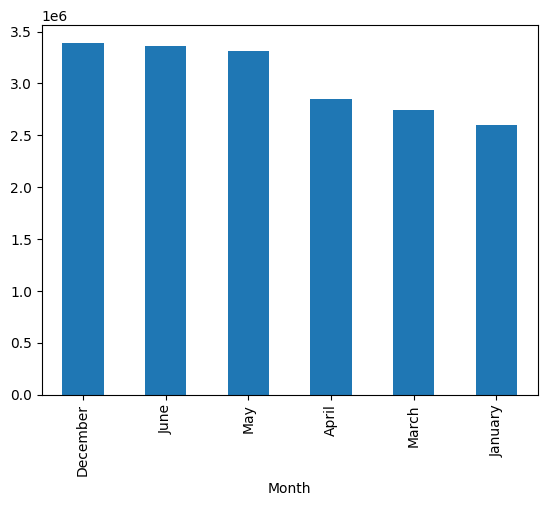

In [112]:
bikes_data.groupby('Month')['Profit'].sum().sort_values(ascending=False).head(6).plot(kind='bar')
# plot.bar(pf_mon)

### Most profitable month is December followed by June

<Axes: ylabel='count'>

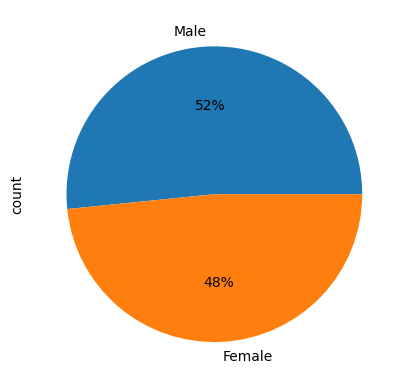

In [119]:
# 4. which Gender has the most orders?
# bikes_data.groupby('Customer_Gender')
bikes_data['Customer_Gender'].value_counts().plot(kind='pie',autopct='%0.0f%%',title='')

### Above pie chart is clearly indicates that most of the bikes purchase by male but there no huge difference between male and female

<Axes: title={'center': ' Order Quatity by Gender'}, ylabel='Order_Quantity'>

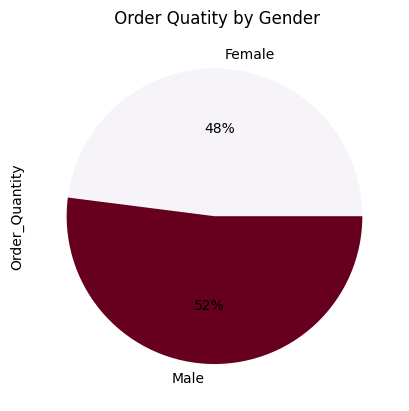

In [134]:
bikes_data.groupby('Customer_Gender')['Order_Quantity'].sum().plot(kind='pie',autopct='%0.0f%%',title=' Order Quatity by Gender',cmap='PuRd')

In [ ]:
# 5. which country/state generates the highest revenue?

<Axes: ylabel='Country'>

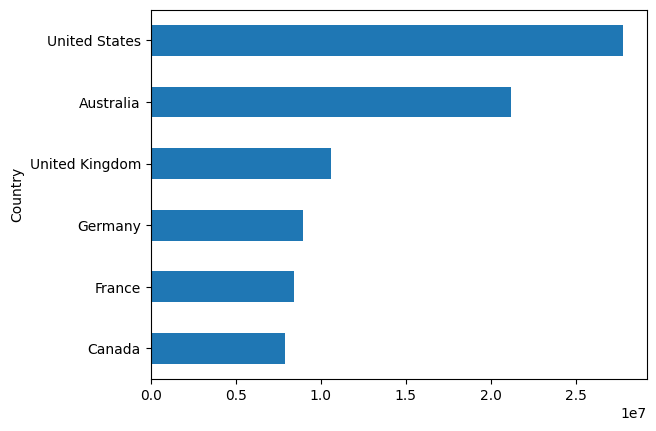

In [137]:
bikes_data.groupby("Country")["Revenue"].sum().sort_values(ascending=True).plot(kind='barh')

### Highest Revenue is generated by United States

In [ ]:

6. is there any correlation between the customer’s age and revenue?


In [166]:
corr=bikes_data.select_dtypes(exclude=['datetime64[ns]','object']).corr()

In [167]:
corr

,Year,Customer_Id,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
Year,1.000000,0.000325,0.040879,0.124091,-0.217431,-0.213538,-0.215449,-0.208514,-0.181349
Customer_Id,0.000325,1.000000,-0.036091,0.004996,-0.041055,-0.051352,-0.043855,-0.053169,-0.067853
Customer_Age,0.040879,-0.036091,1.000000,0.027376,-0.021401,-0.020301,-0.016012,-0.009303,0.004388
Order_Quantity,0.124091,0.004996,0.027376,1.000000,-0.516289,-0.516387,-0.340386,-0.312880,-0.238770
Unit_Cost,-0.217431,-0.041055,-0.021401,-0.516289,1.000000,0.997891,0.829557,0.817544,0.740623
Unit_Price,-0.213538,-0.051352,-0.020301,-0.516387,0.997891,1.000000,0.825965,0.818176,0.749450
Cost,-0.215449,-0.043855,-0.016012,-0.340386,0.829557,0.825965,1.000000,0.988748,0.902109
Revenue,-0.208514,-0.053169,-0.009303,-0.312880,0.817544,0.818176,0.988748,1.000000,0.956508
Profit,-0.181349,-0.067853,0.004388,-0.238770,0.740623,0.749450,0.902109,0.956508,1.000000


In [ ]:
7. which category/subcategory generates the most profit?

<Axes: ylabel='Profit'>

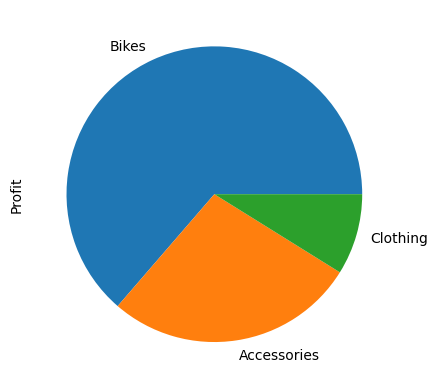

In [171]:
bikes_data.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False).head().plot(kind='pie')

<Axes: xlabel='Sub_Category'>

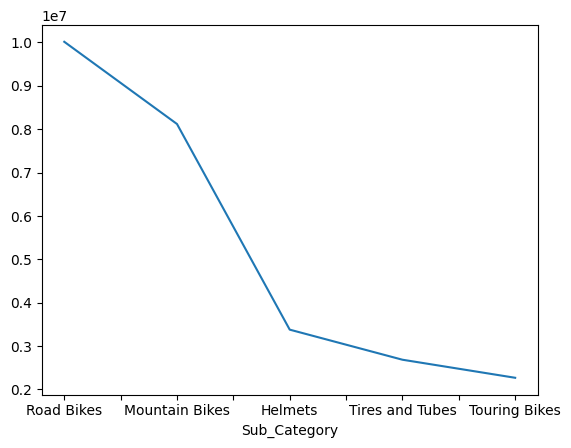

In [172]:
bikes_data.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head().plot()